<a href="https://colab.research.google.com/github/jazeenajazeem/AI-Avengers/blob/main/introduction_to_intelligent_systems_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
iris = pd.read_csv("Iris.csv") #load the dataset

In [30]:
iris.head(10) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
iris.drop('Id', axis=1 , inplace = True)
#dropping the Id column as it is uecessary,
#axis=1 specifies that it should be column wise,
#inplace =1 means the changes should be reflected into the dataframe


In [33]:
iris.info()
#checking that the redundant column has been removed from the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


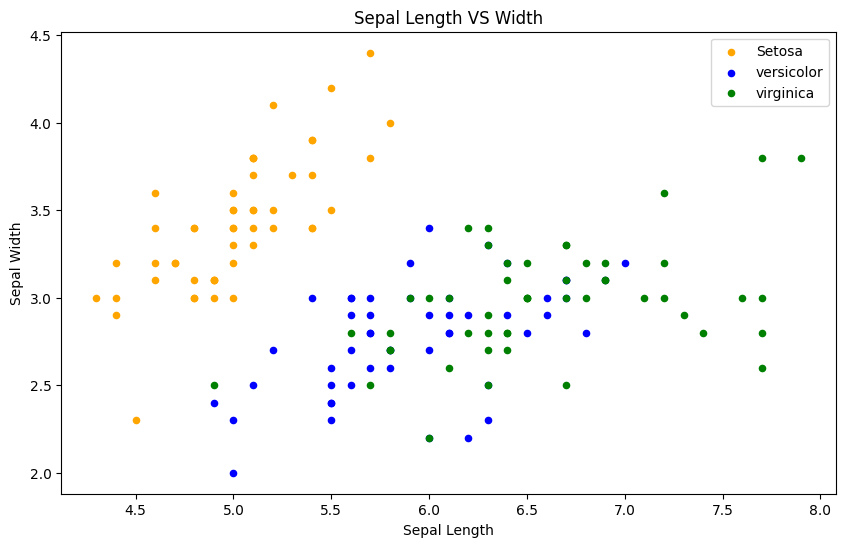

In [34]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
#Plotting a graph that indicates the relationship between the length and width of the sepal

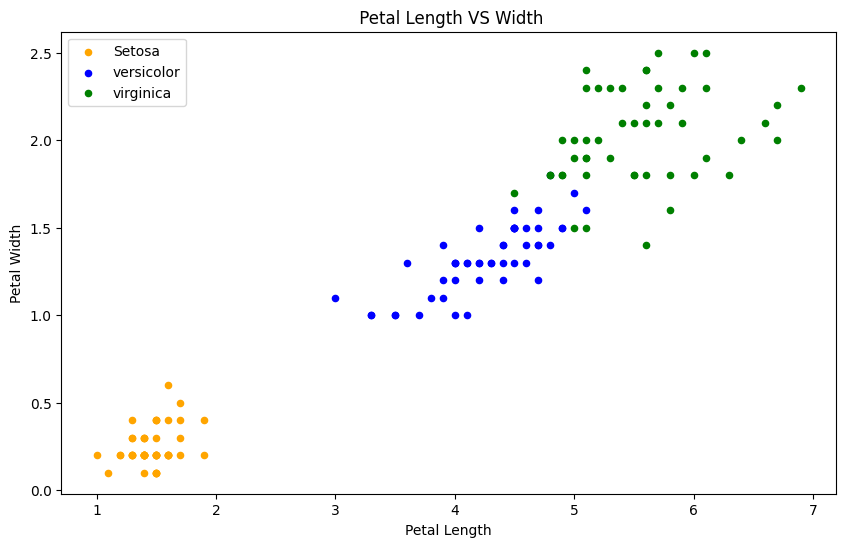

In [35]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
#Plotting a graph that indicates the relationship between the length and width of the petal
#because the clustering of the petal length vs Width is far more distinct than with the sepal,
#It's clear that is may serve as a better indicator for clustering in classifying the different species

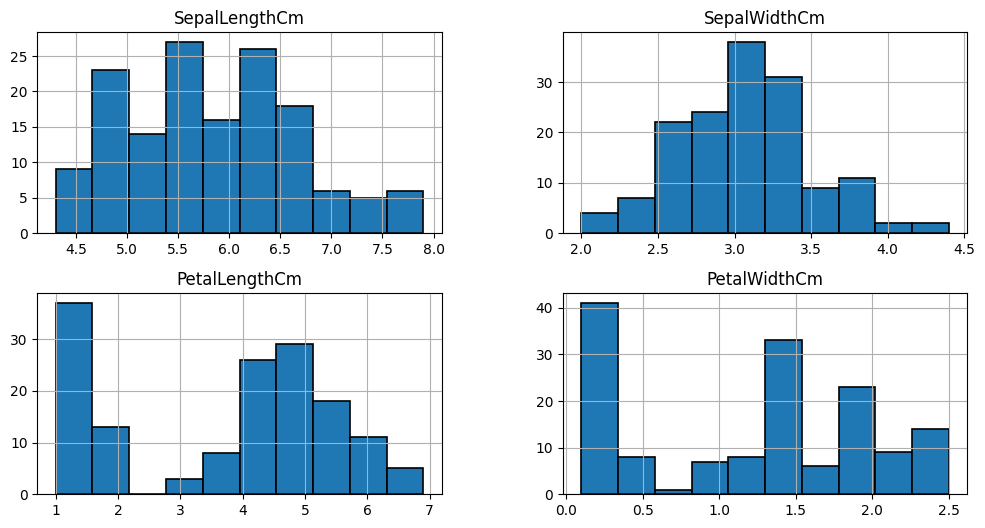

In [36]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

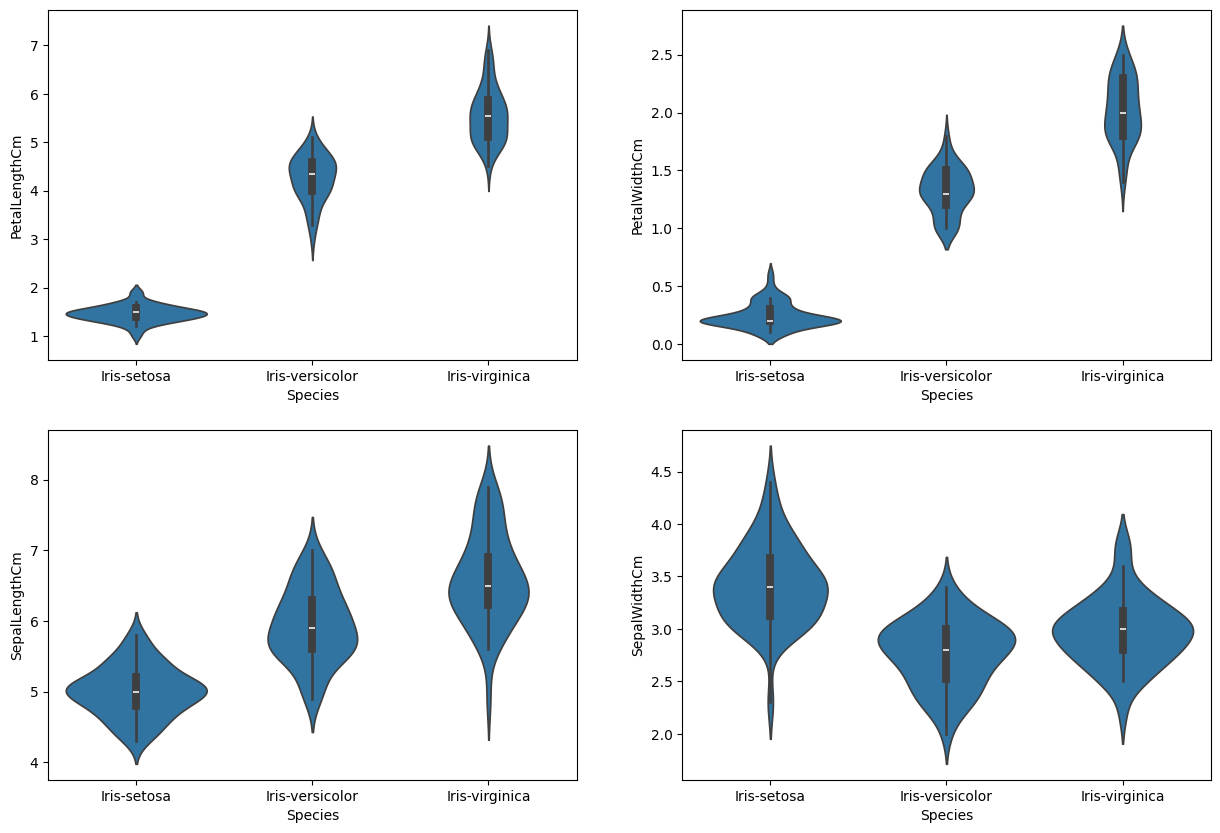

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

# The purpose of the violin plot is to visualise and compare the relationship
# between the length and width of the sepals depending on the species of the Iris
# The violinplot shows density of the length and width in the species.
# The thinner part denotes that there is less density whereas the fatter part conveys higher density



Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.¶

Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.


In [38]:


# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm



In [39]:
iris.shape
#get the shape of the dataset
#150 samples and 5 columns

(150, 5)

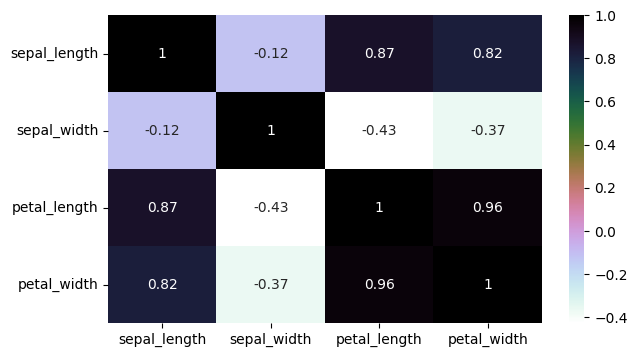

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
iris = sns.load_dataset("iris")
numeric_columns = iris.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='cubehelix_r')
plt.show()


In [41]:


train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)



(105, 5)
(45, 5)


In [42]:
print(train.columns)

# Splitting the data into features and target variable
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features for training data
train_y = train['species']  # Target variable for training data

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features for test data
test_y = test['species']  # Target variable for test data


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [43]:


train_X.head(20)



,sepal_length,sepal_width,petal_length,petal_width
30,4.8,3.1,1.6,0.2
105,7.6,3.0,6.6,2.1
5,5.4,3.9,1.7,0.4
23,5.1,3.3,1.7,0.5
11,4.8,3.4,1.6,0.2
129,7.2,3.0,5.8,1.6
126,6.2,2.8,4.8,1.8
75,6.6,3.0,4.4,1.4
108,6.7,2.5,5.8,1.8
44,5.1,3.8,1.9,0.4


In [44]:


test_X.head(20)



,sepal_length,sepal_width,petal_length,petal_width
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
116,6.5,3.0,5.5,1.8
97,6.2,2.9,4.3,1.3
138,6.0,3.0,4.8,1.8
122,7.7,2.8,6.7,2.0
88,5.6,3.0,4.1,1.3
142,5.8,2.7,5.1,1.9
118,7.7,2.6,6.9,2.3


In [45]:


train_y.head()  ##output of the training data



30        setosa
105    virginica
5         setosa
23        setosa
11        setosa
Name: species, dtype: object

In [46]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y)*100,'%')

The accuracy of the Decision Tree is 91.11111111111111 %


In [47]:
model=KNeighborsClassifier(n_neighbors=7) # this examines 7 neighbours for putting the new data into a class
                                          # starting with a k value of 3 the accuracy is 93.3333...
                                          # but with subequent odd k numbers(5,7,9...), the accuracy stabilises, but
                                          # fluctuates between 95.55555555555556% and 97.77777777777777%
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100,'%')

The accuracy of the KNN is 93.33333333333333 %


In [48]:
# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])

# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

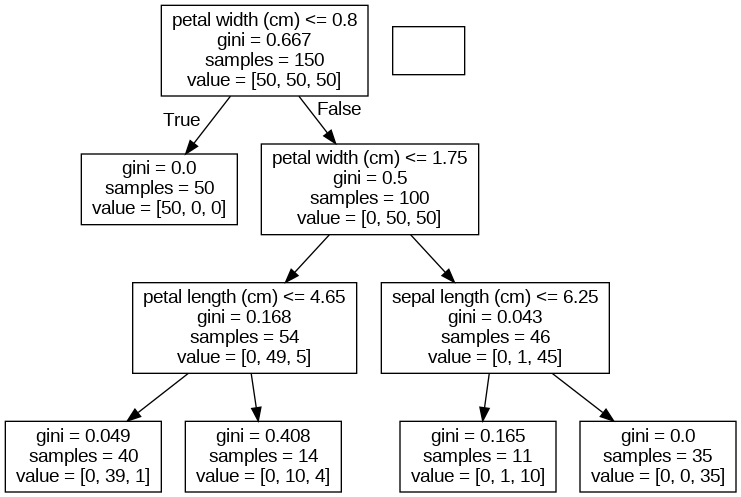

In [49]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [50]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [52]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Removing the Id column from our dataset as it is not needed

In [55]:
data.drop(columns = ['Id'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Multivariate Analysis
It refers to an analysis involving multiple dependent variables resulting in one outcome. Creating different graphs for all the features to perform bivariate analysis would be extremely tedious. Seaborn provides a convenient way to perform multivariate analysis using the pairplot function.

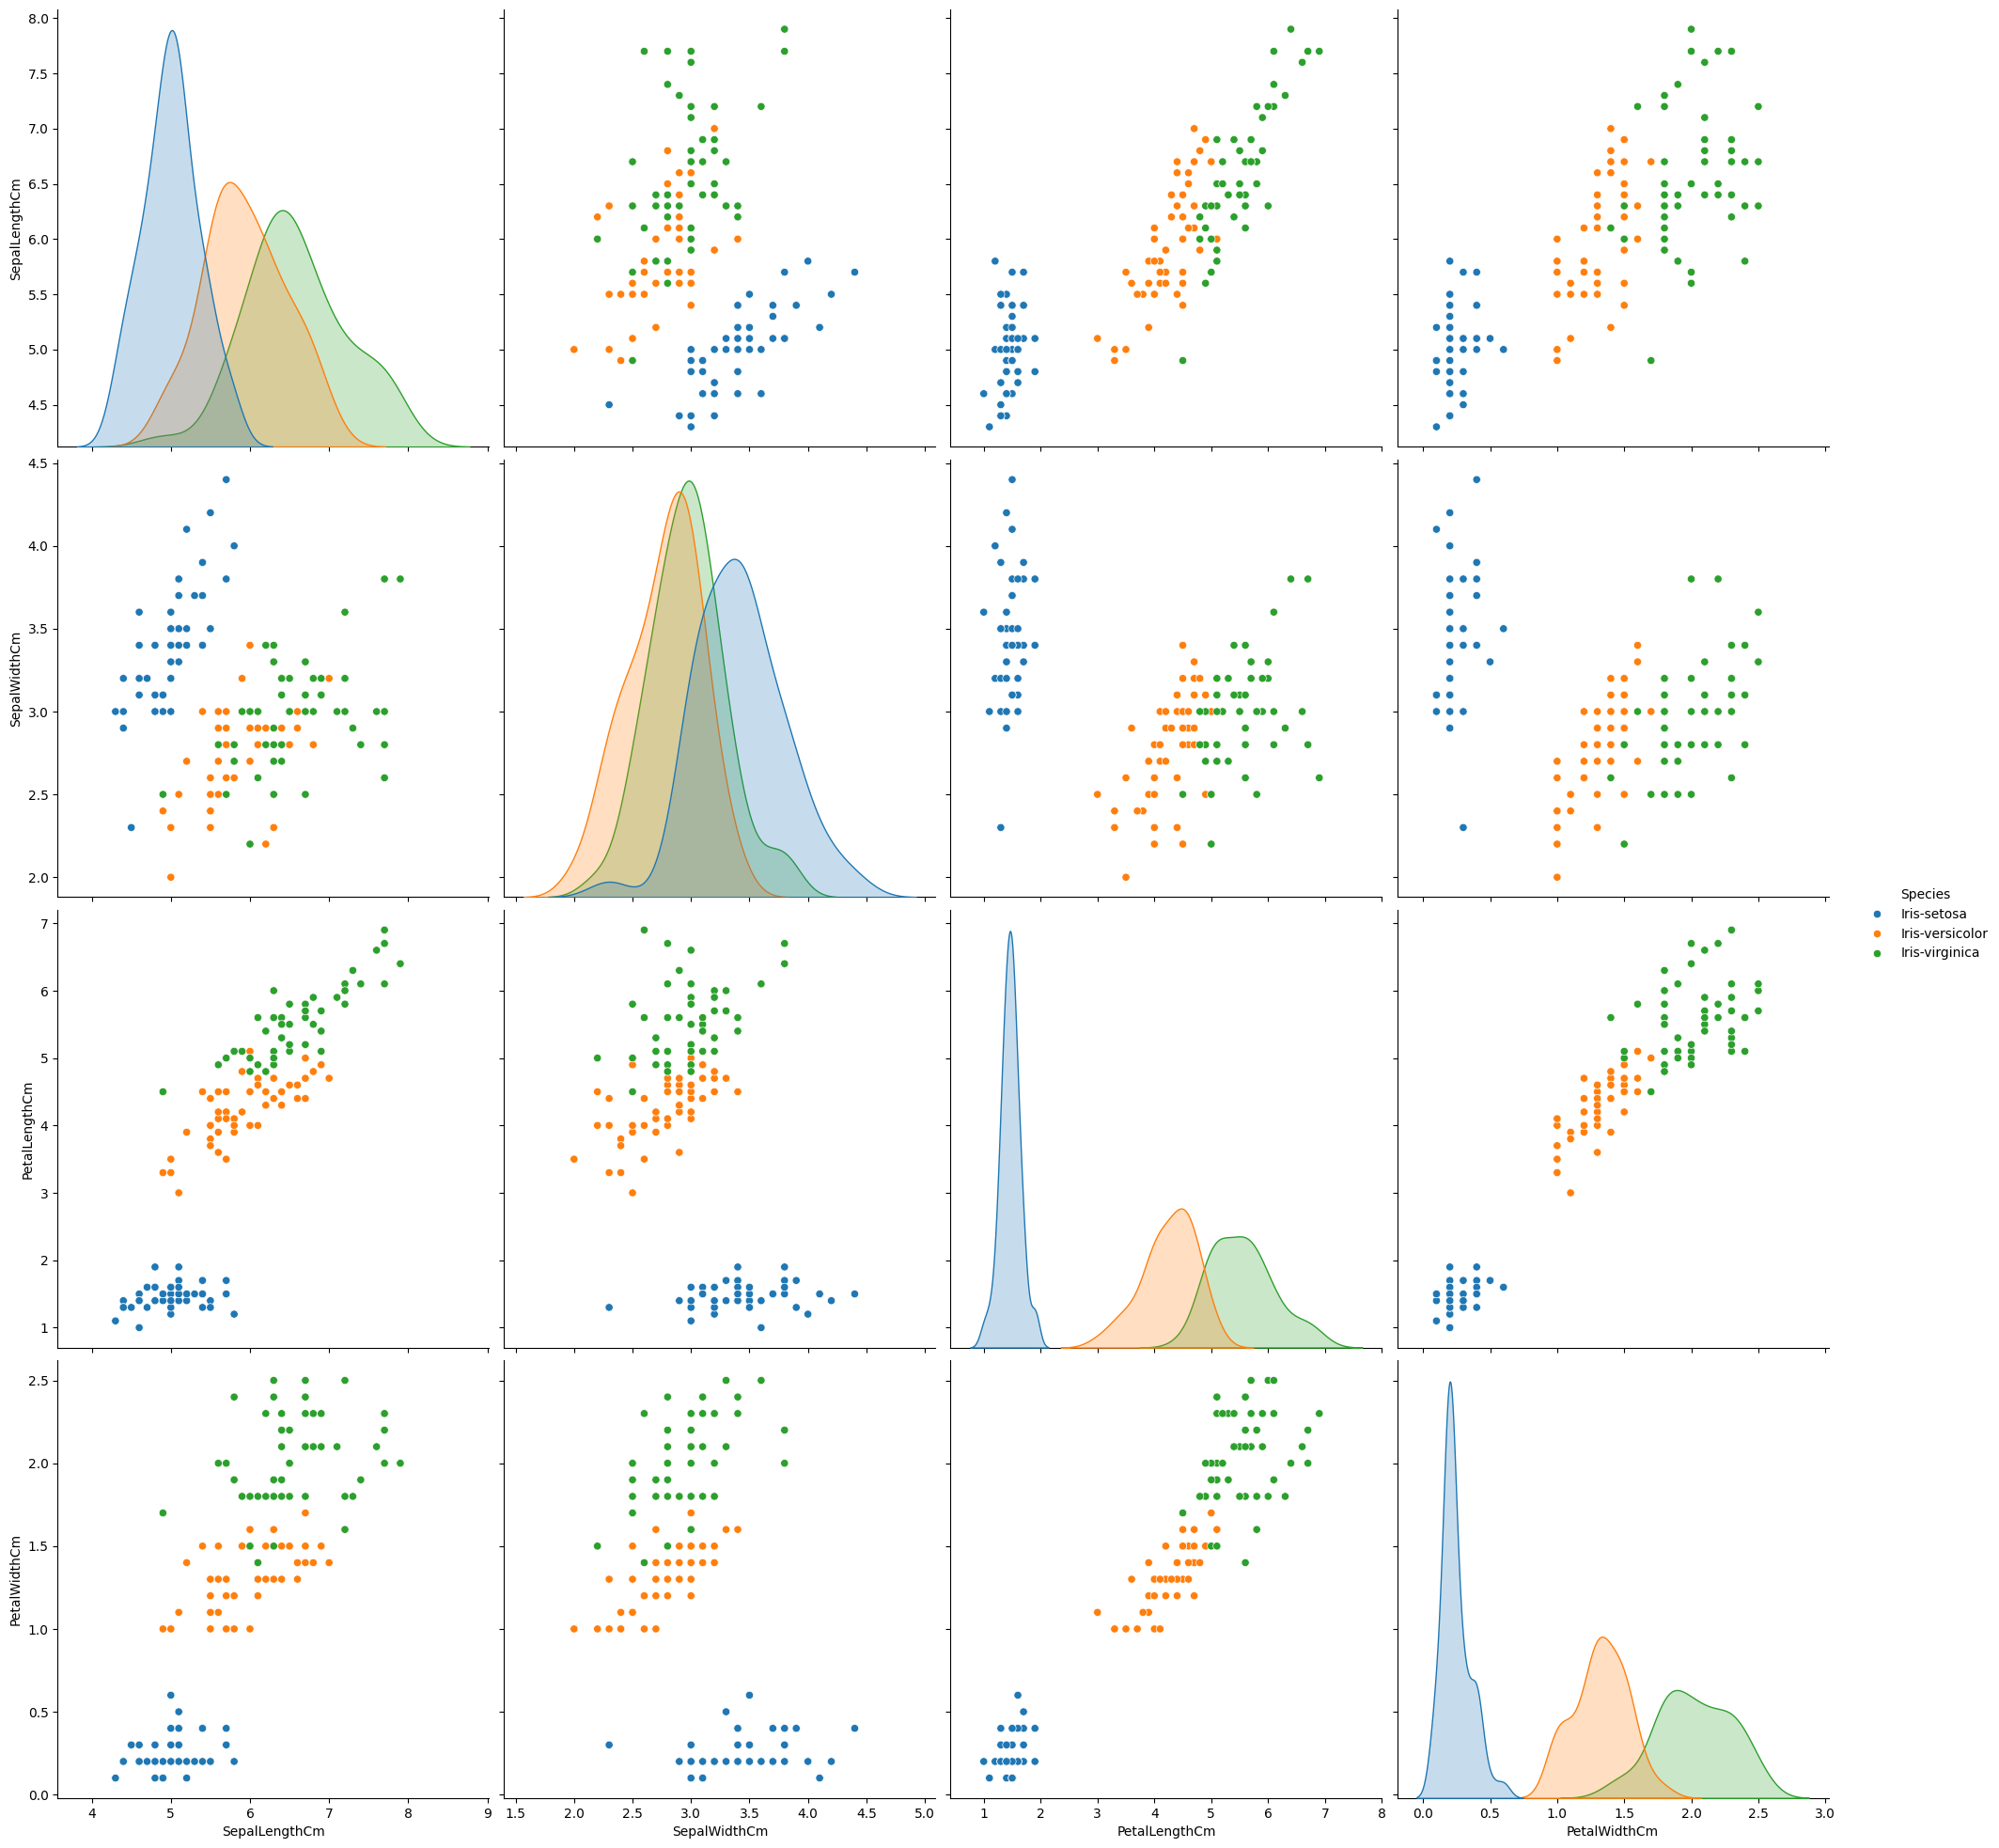

In [56]:
sns.pairplot(data, hue = 'Species', height = 5)
plt.show()

Split labels from Data

In [57]:
X = data.drop(['Species'], axis = 1)
y = data['Species']

Encoding the Categories for the Label

In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [59]:
y[:5]

array([0, 0, 0, 0, 0])

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

Import TensorFlow

In [62]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [63]:
# let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(3, activation='relu'),
           tf.keras.layers.Dense(5, activation='relu'),
           tf.keras.layers.Dense(3, activation='softmax')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train,
                      tf.one_hot(y_train, depth=3),
                      epochs=100,
                      verbose = 1)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 1.1956 - accuracy: 0.1583
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1264 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0924 - accuracy: 0.5750
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0661 - accuracy: 0.6583
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0485 - accuracy: 0.7917
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0273 - accuracy: 0.8000
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9970 - accuracy: 0.8167
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9623 - accuracy: 0.8167
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9321 - accuracy: 0.8167
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9055 - accuracy: 0.8167
Epoch 11/100
4/4 [===========

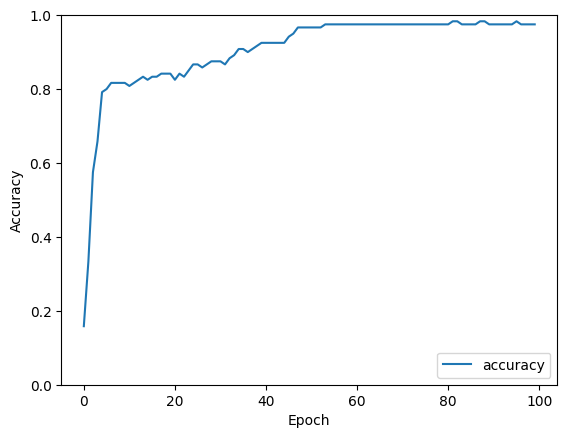

In [64]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right');

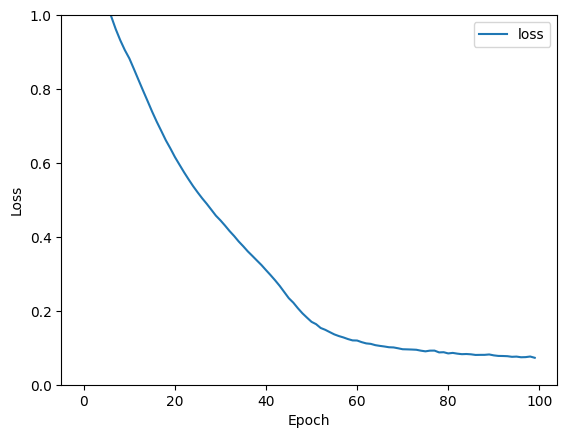

In [65]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');

In [66]:
model_1.evaluate(X_test, tf.one_hot(y_test, depth=3))[1] * 100

1/1 [==============================] - 1s 877ms/step - loss: 0.0430 - accuracy: 1.0000


100.0

1/1 [==============================] - 0s 186ms/step


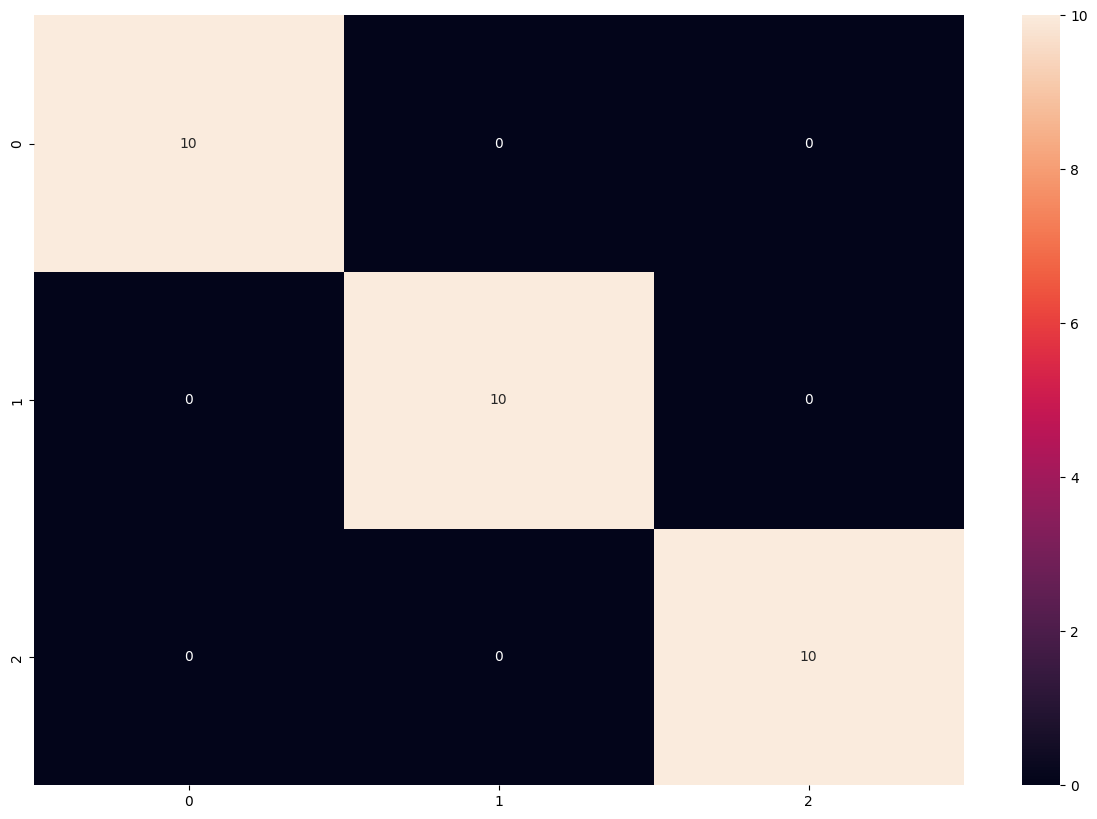

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_true=y_test,
                 y_pred=model_1.predict(X_test).argmax(axis=1)), annot=True,
                 fmt="d");